In [16]:
import pandas as pd, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.express as pe 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import multivariate_normal

In [6]:
fcst_qty = [1431,
339,
60,
84,
3870,
4743,
2121,
342,
60,
5376,
1353,
2,
1380 ]

err = [0.388753056234719,
0.849624060150376,
0.413793103448276,
0.545454545454545,
0.401036269430052,
0.519041365725542,
0.643507281553398,
0.681274900398406,
0.5,
0.45420750253464,
0.838809671419715,
1,
0.500907441016334
]

df = pd.DataFrame(data={'fcst_qty': fcst_qty,'err': err})
df


,fcst_qty,err
0,1431,0.388753
1,339,0.849624
2,60,0.413793
3,84,0.545455
4,3870,0.401036
5,4743,0.519041
6,2121,0.643507
7,342,0.681275
8,60,0.500000
9,5376,0.454208


In [15]:
kde_dist = gaussian_kde([df['fcst_qty']], bw_method='scott')
print(df['fcst_qty'].min()*0.9*3, df['fcst_qty'].max()*3)
x= np.linspace(df['fcst_qty'].min()*0.9*3, df['fcst_qty'].max()*1.1*3, 90)
x

5.4 16128


array([5.40000000e+00, 2.04674157e+02, 4.03948315e+02, 6.03222472e+02,
       8.02496629e+02, 1.00177079e+03, 1.20104494e+03, 1.40031910e+03,
       1.59959326e+03, 1.79886742e+03, 1.99814157e+03, 2.19741573e+03,
       2.39668989e+03, 2.59596404e+03, 2.79523820e+03, 2.99451236e+03,
       3.19378652e+03, 3.39306067e+03, 3.59233483e+03, 3.79160899e+03,
       3.99088315e+03, 4.19015730e+03, 4.38943146e+03, 4.58870562e+03,
       4.78797978e+03, 4.98725393e+03, 5.18652809e+03, 5.38580225e+03,
       5.58507640e+03, 5.78435056e+03, 5.98362472e+03, 6.18289888e+03,
       6.38217303e+03, 6.58144719e+03, 6.78072135e+03, 6.97999551e+03,
       7.17926966e+03, 7.37854382e+03, 7.57781798e+03, 7.77709213e+03,
       7.97636629e+03, 8.17564045e+03, 8.37491461e+03, 8.57418876e+03,
       8.77346292e+03, 8.97273708e+03, 9.17201124e+03, 9.37128539e+03,
       9.57055955e+03, 9.76983371e+03, 9.96910787e+03, 1.01683820e+04,
       1.03676562e+04, 1.05669303e+04, 1.07662045e+04, 1.09654787e+04,
      

In [19]:
y = multivariate_normal.pdf(x, np.mean(x), np.cov(x))
y

array([1.79623268e-05, 1.91584807e-05, 2.04043709e-05, 2.16994648e-05,
       2.30429729e-05, 2.44338366e-05, 2.58707186e-05, 2.73519939e-05,
       2.88757425e-05, 3.04397444e-05, 3.20414760e-05, 3.36781089e-05,
       3.53465109e-05, 3.70432494e-05, 3.87645969e-05, 4.05065392e-05,
       4.22647863e-05, 4.40347857e-05, 4.58117379e-05, 4.75906153e-05,
       4.93661823e-05, 5.11330191e-05, 5.28855470e-05, 5.46180558e-05,
       5.63247333e-05, 5.79996967e-05, 5.96370252e-05, 6.12307942e-05,
       6.27751102e-05, 6.42641468e-05, 6.56921809e-05, 6.70536286e-05,
       6.83430821e-05, 6.95553447e-05, 7.06854660e-05, 7.17287751e-05,
       7.26809131e-05, 7.35378632e-05, 7.42959788e-05, 7.49520097e-05,
       7.55031249e-05, 7.59469333e-05, 7.62815008e-05, 7.65053642e-05,
       7.66175421e-05, 7.66175421e-05, 7.65053642e-05, 7.62815008e-05,
       7.59469333e-05, 7.55031249e-05, 7.49520097e-05, 7.42959788e-05,
       7.35378632e-05, 7.26809131e-05, 7.17287751e-05, 7.06854660e-05,
      

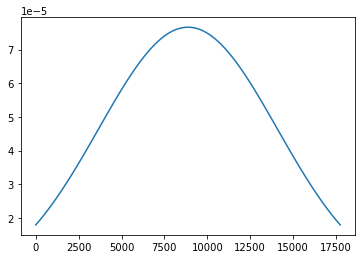

In [20]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

In [24]:
df_output = pd.DataFrame(data={'x':x, 'y':y})
df_output['error'] = df_output['x'] / (df_output['x'] + 12495)
df_output
df_output.to_excel("output.xlsx")